# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

Training w: alpha=1e-09 & 50000.0
iteration 0 / 800: loss 89.059745
iteration 100 / 800: loss 87.507077
iteration 200 / 800: loss 85.969036
iteration 300 / 800: loss 84.458613
iteration 400 / 800: loss 82.980286
iteration 500 / 800: loss 81.540076
iteration 600 / 800: loss 80.126944
iteration 700 / 800: loss 78.731787


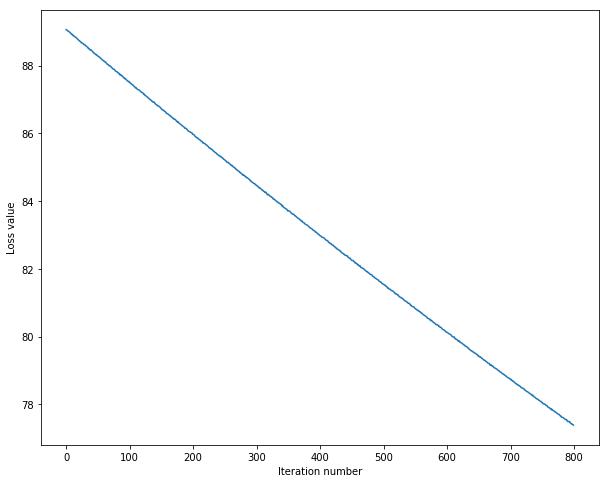

training accuracy: 0.11079591836734694
validation accuracy: 0.113
--
Training w: alpha=1e-09 & 500000.0
iteration 0 / 800: loss 788.188359
iteration 100 / 800: loss 647.066607
iteration 200 / 800: loss 531.526165
iteration 300 / 800: loss 436.951987
iteration 400 / 800: loss 359.524324
iteration 500 / 800: loss 296.137244
iteration 600 / 800: loss 244.247723
iteration 700 / 800: loss 201.764282


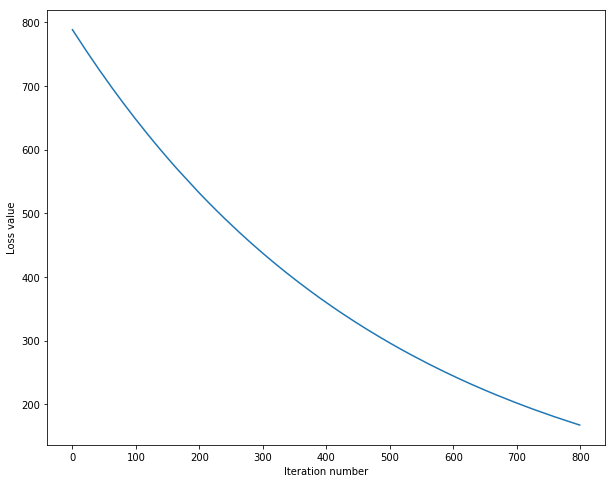

training accuracy: 0.09883673469387755
validation accuracy: 0.105
--
Training w: alpha=1e-09 & 5000000.0
iteration 0 / 800: loss 8384.188227
iteration 100 / 800: loss 1131.970969
iteration 200 / 800: loss 160.323414
iteration 300 / 800: loss 30.139525
iteration 400 / 800: loss 12.698498
iteration 500 / 800: loss 10.361501
iteration 600 / 800: loss 10.048467
iteration 700 / 800: loss 10.006482


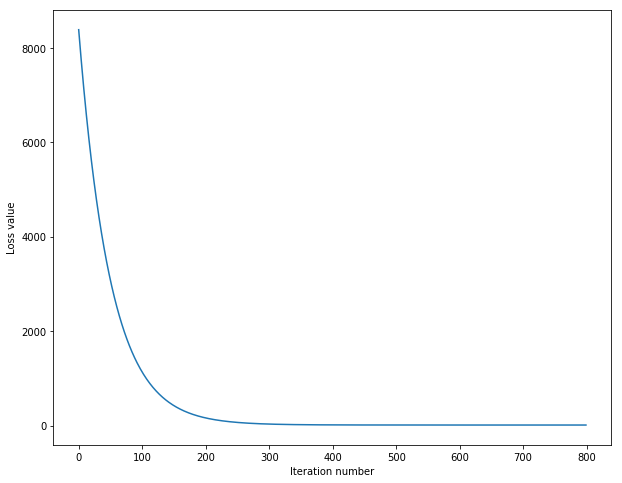

training accuracy: 0.12489795918367347
validation accuracy: 0.128
--
Training w: alpha=1e-08 & 50000.0
iteration 0 / 800: loss 87.682482
iteration 100 / 800: loss 73.581401
iteration 200 / 800: loss 62.059989
iteration 300 / 800: loss 52.624959
iteration 400 / 800: loss 44.875397
iteration 500 / 800: loss 38.559008
iteration 600 / 800: loss 33.378811
iteration 700 / 800: loss 29.140278


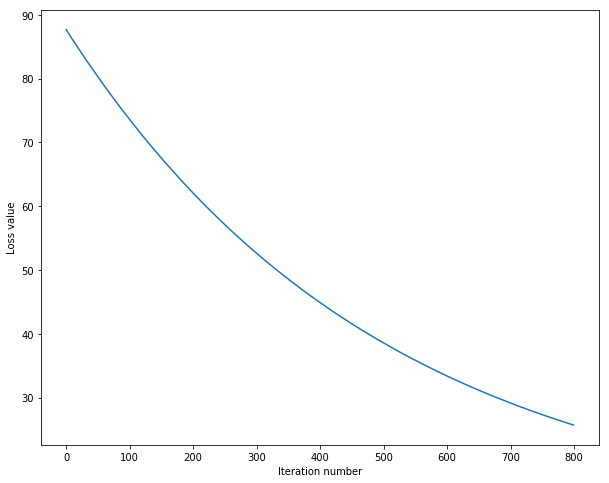

training accuracy: 0.10883673469387756
validation accuracy: 0.106
--
Training w: alpha=1e-08 & 500000.0
iteration 0 / 800: loss 788.970826
iteration 100 / 800: loss 114.359907
iteration 200 / 800: loss 23.982050
iteration 300 / 800: loss 11.873055
iteration 400 / 800: loss 10.250978
iteration 500 / 800: loss 10.033592
iteration 600 / 800: loss 10.004445
iteration 700 / 800: loss 10.000564


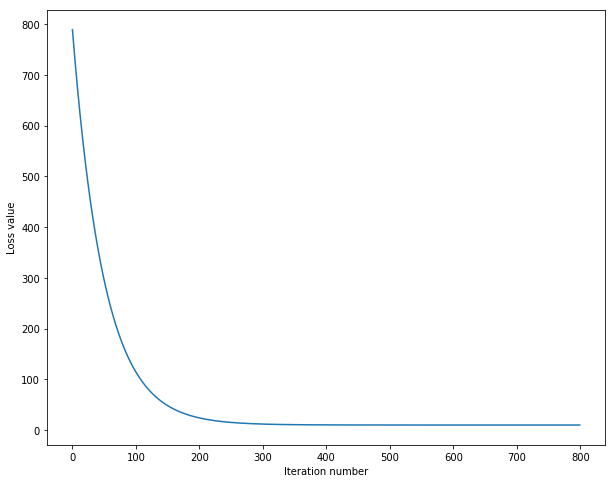

training accuracy: 0.33579591836734696
validation accuracy: 0.346
--
Training w: alpha=1e-08 & 5000000.0
iteration 0 / 800: loss 7750.266844
iteration 100 / 800: loss 10.000003
iteration 200 / 800: loss 9.999997
iteration 300 / 800: loss 9.999996
iteration 400 / 800: loss 9.999997
iteration 500 / 800: loss 9.999997
iteration 600 / 800: loss 9.999996
iteration 700 / 800: loss 9.999997


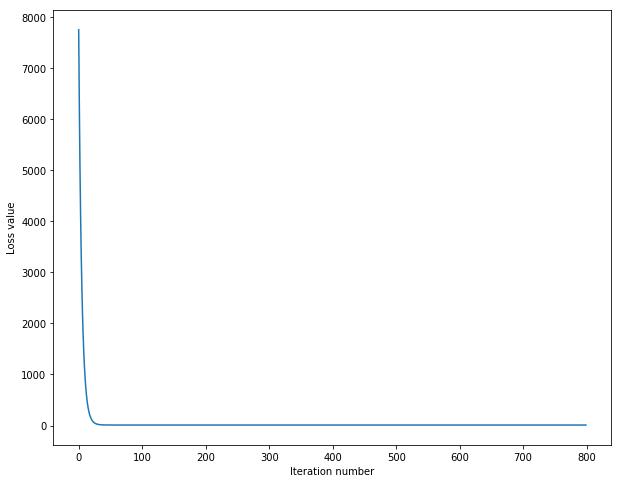

training accuracy: 0.403265306122449
validation accuracy: 0.396
--
Training w: alpha=1e-07 & 50000.0
iteration 0 / 800: loss 80.538710
iteration 100 / 800: loss 19.451350
iteration 200 / 800: loss 11.266051
iteration 300 / 800: loss 10.169259
iteration 400 / 800: loss 10.022233
iteration 500 / 800: loss 10.002634
iteration 600 / 800: loss 10.000126
iteration 700 / 800: loss 9.999686


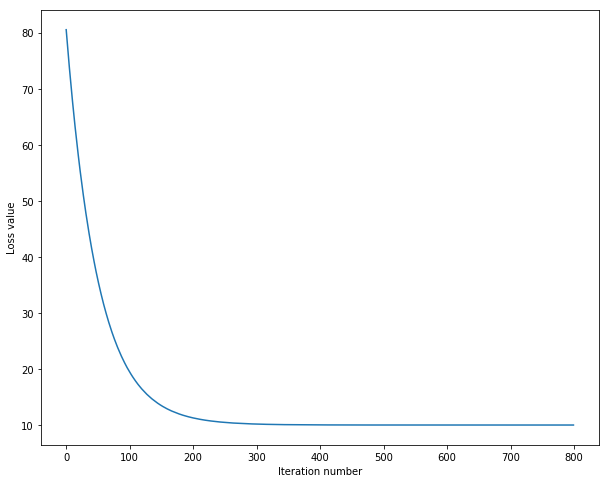

training accuracy: 0.4149795918367347
validation accuracy: 0.414
--
Training w: alpha=1e-07 & 500000.0
iteration 0 / 800: loss 802.612959
iteration 100 / 800: loss 9.999966
iteration 200 / 800: loss 9.999965
iteration 300 / 800: loss 9.999968
iteration 400 / 800: loss 9.999969
iteration 500 / 800: loss 9.999974
iteration 600 / 800: loss 9.999962
iteration 700 / 800: loss 9.999956


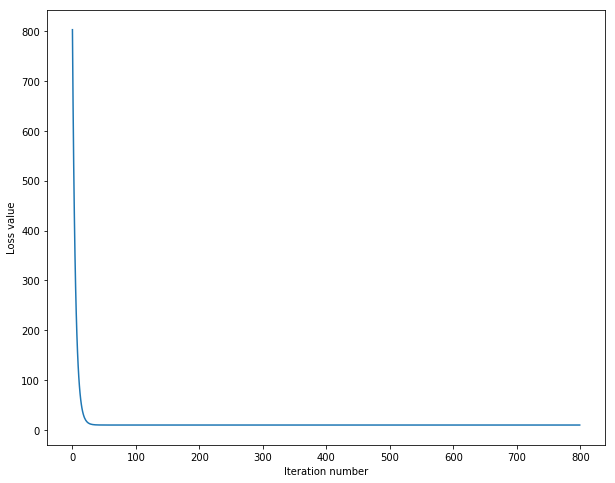

training accuracy: 0.4155714285714286
validation accuracy: 0.411
--
Training w: alpha=1e-07 & 5000000.0
iteration 0 / 800: loss 7536.495087
iteration 100 / 800: loss 10.000000
iteration 200 / 800: loss 10.000000
iteration 300 / 800: loss 10.000000
iteration 400 / 800: loss 10.000000
iteration 500 / 800: loss 9.999999
iteration 600 / 800: loss 10.000002
iteration 700 / 800: loss 9.999999


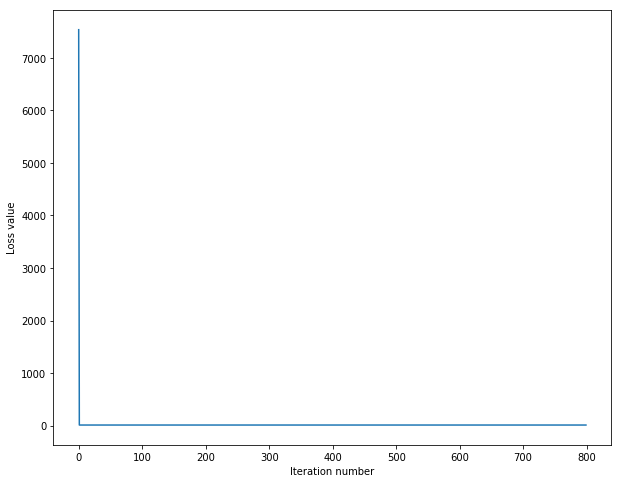

training accuracy: 0.33677551020408164
validation accuracy: 0.366
--
lr 1.000000e-09 reg 5.000000e+04 train accuracy: 0.110796 val accuracy: 0.113000
lr 1.000000e-09 reg 5.000000e+05 train accuracy: 0.098837 val accuracy: 0.105000
lr 1.000000e-09 reg 5.000000e+06 train accuracy: 0.124898 val accuracy: 0.128000
lr 1.000000e-08 reg 5.000000e+04 train accuracy: 0.108837 val accuracy: 0.106000
lr 1.000000e-08 reg 5.000000e+05 train accuracy: 0.335796 val accuracy: 0.346000
lr 1.000000e-08 reg 5.000000e+06 train accuracy: 0.403265 val accuracy: 0.396000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.414980 val accuracy: 0.414000
lr 1.000000e-07 reg 5.000000e+05 train accuracy: 0.415571 val accuracy: 0.411000
lr 1.000000e-07 reg 5.000000e+06 train accuracy: 0.336776 val accuracy: 0.366000
best validation accuracy achieved during cross-validation: 0.414000


In [6]:
# Use the validation set to tune the learning rate and regularization strength
from itertools import product
from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
def train(X_train, y_train, X_val, y_val, learning_rate, reg, num_iters):
    """ Trains an SVM and records its training and validation accuracies."""
    svm = LinearSVM()
    loss = svm.train(
        X_train, y_train, 
        learning_rate=learning_rate, 
        reg=reg,
        num_iters=num_iters, 
        verbose=True
    )
    plt.plot(loss)
    plt.xlabel('Iteration number')
    plt.ylabel('Loss value')
    plt.show()
    y_train_pred = svm.predict(X_train)
    #import pdb; pdb.set_trace()
    training_accuracy = np.mean(y_train == y_train_pred)
    print(f'training accuracy: {training_accuracy}')                            

    y_val_pred = svm.predict(X_val)
    val_accuracy = np.mean(y_val == y_val_pred)                                    
    print(f'validation accuracy: {val_accuracy}')
    results[(learning_rate, reg)] = (training_accuracy, val_accuracy)
    return (training_accuracy, val_accuracy, svm)


for learning_rate, reg in product(learning_rates, regularization_strengths):
    # import pdb; pdb.set_trace()
    print(f'Training w: alpha={learning_rate} & {reg}')
    training_accuracy, val_accuracy, svm = train(X_train_feats, y_train, X_val_feats, y_val, learning_rate, reg, 800)
    if val_accuracy > best_val:
        best_val = val_accuracy
        best_svm = svm
    print('--')
    
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

In [7]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.416


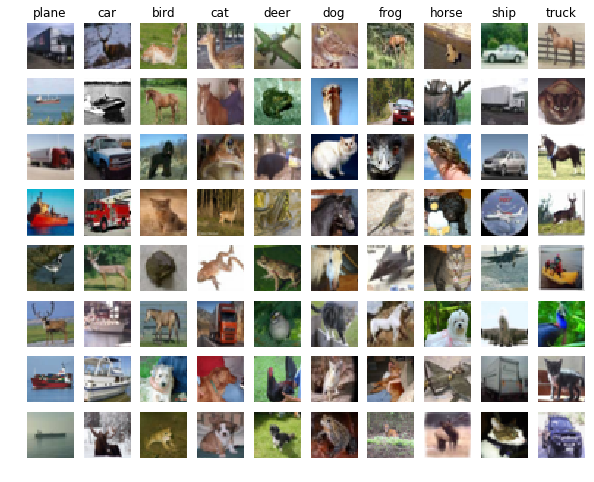

In [9]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
They all blue.

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [10]:
print(X_train_feats.shape)

(49000, 155)


In [17]:
def plot_hist(stats, params, val_acc):
    fig = plt.figure()    
    st = fig.suptitle(f'Val acc: {val_acc} with: Learning rate: {params["learning_rate"]} // reg: {params["reg"]} // batch size: {params["batch_size"]}')
    ax1 = fig.add_subplot(211)
    ax1.plot(stats['loss_history'])
    ax1.set_title('Loss history')
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Loss')

    ax2 = fig.add_subplot(212)
    ax2.plot(stats['train_acc_history'], 'r', label='train')  # red
    ax2.plot(stats['val_acc_history'], 'g', label='val')  # green
    ax2.set_title('Classification accuracy history')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Clasification accuracy')    
    fig.tight_layout()
    st.set_y(0.95)
    fig.subplots_adjust(top=0.85)    

In [21]:
best_net = None
best_nets = []
best_acc = 0
best_hyperparams = {}

0 ====================
{'learning_rate': 0.0021139008048006256, 'reg': 7.346417710866111, 'num_iters': 1250, 'batch_size': 250, 'decay_rate': 0.999}
iteration 0 / 1250: loss 2.302792
	W1 update scale is: 0.0010642038860444849
	b1 update scale is: 1.0
	W2 update scale is: 0.0011508717428438577
	b2 update scale is: 1.0
iteration 100 / 1250: loss 2.302756
	W1 update scale is: 0.0010632439305888386
	b1 update scale is: 0.01619814821296445
	W2 update scale is: 0.001141706813112284
	b2 update scale is: 0.10233823706718494
iteration 200 / 1250: loss 2.302704
	W1 update scale is: 0.0010606246435301478
	b1 update scale is: 0.0069669950093460935
	W2 update scale is: 0.0011110677985561668
	b2 update scale is: 0.0447848519731948
iteration 300 / 1250: loss 2.302732
	W1 update scale is: 0.001059120575126058
	b1 update scale is: 0.005136904640668262
	W2 update scale is: 0.0011018016841662453
	b2 update scale is: 0.0497255738618809
iteration 400 / 1250: loss 2.302617
	W1 update scale is: 0.00105734937

iteration 1500 / 2500: loss 2.302566
	W1 update scale is: 0.0003188905662729008
	b1 update scale is: 8.715856994075706e-05
	W2 update scale is: 0.00016367538324583565
	b2 update scale is: 0.007234101070984202
iteration 1600 / 2500: loss 2.302593
	W1 update scale is: 0.0003001815520036106
	b1 update scale is: 7.026781446172179e-05
	W2 update scale is: 0.00015058590928978416
	b2 update scale is: 0.00724296823282497
iteration 1700 / 2500: loss 2.302609
	W1 update scale is: 0.00027616565545280963
	b1 update scale is: 6.459868930805319e-05
	W2 update scale is: 0.00013342881123838316
	b2 update scale is: 0.003770362262747771
iteration 1800 / 2500: loss 2.302454
	W1 update scale is: 0.0002641765862000969
	b1 update scale is: 5.152857588859753e-05
	W2 update scale is: 0.00014576688158995257
	b2 update scale is: 0.005160950331630274
iteration 1900 / 2500: loss 2.302714
	W1 update scale is: 0.0002444080983999857
	b1 update scale is: 5.331614156141747e-05
	W2 update scale is: 0.000114482204222033

iteration 700 / 2500: loss 2.302451
	W1 update scale is: 0.0005567201415872822
	b1 update scale is: 9.138042088685694e-05
	W2 update scale is: 0.0003789283165440628
	b2 update scale is: 0.018349811096113677
iteration 800 / 2500: loss 2.302865
	W1 update scale is: 0.0007029651628147576
	b1 update scale is: 6.945024318467983e-05
	W2 update scale is: 0.0004445782089307759
	b2 update scale is: 0.018409916212940896
iteration 900 / 2500: loss 2.302587
	W1 update scale is: 0.00046234073501587856
	b1 update scale is: 8.781547388347524e-05
	W2 update scale is: 0.00025295501018718315
	b2 update scale is: 0.012621580079003962
iteration 1000 / 2500: loss 2.302615
	W1 update scale is: 0.00036332075729655173
	b1 update scale is: 7.036469262475358e-05
	W2 update scale is: 0.000241859822418671
	b2 update scale is: 0.016605925082291095
iteration 1100 / 2500: loss 2.302487
	W1 update scale is: 0.0004121246894907809
	b1 update scale is: 3.8400375358780704e-05
	W2 update scale is: 0.00033624851767186635
	

KeyboardInterrupt: 

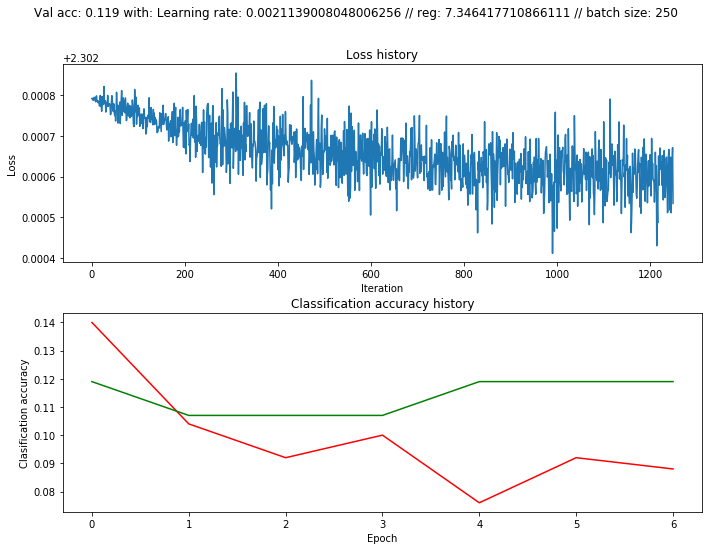

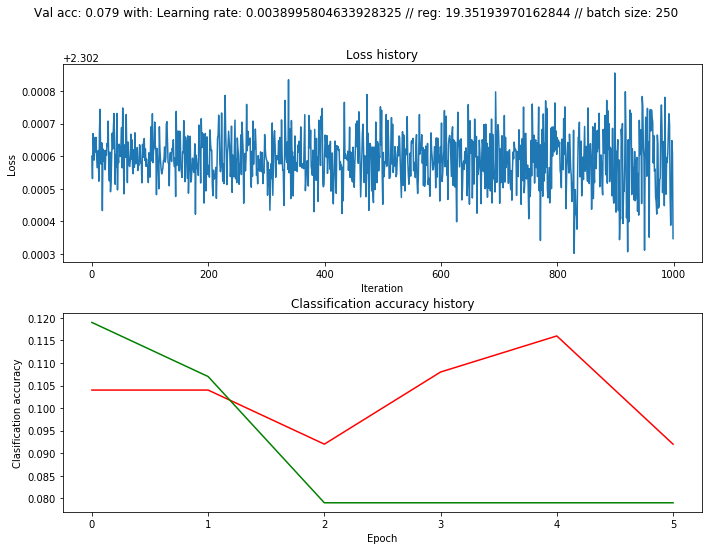

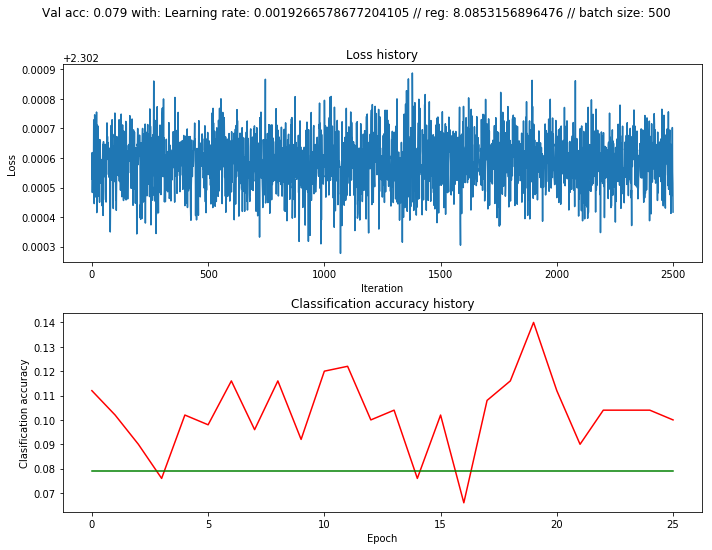

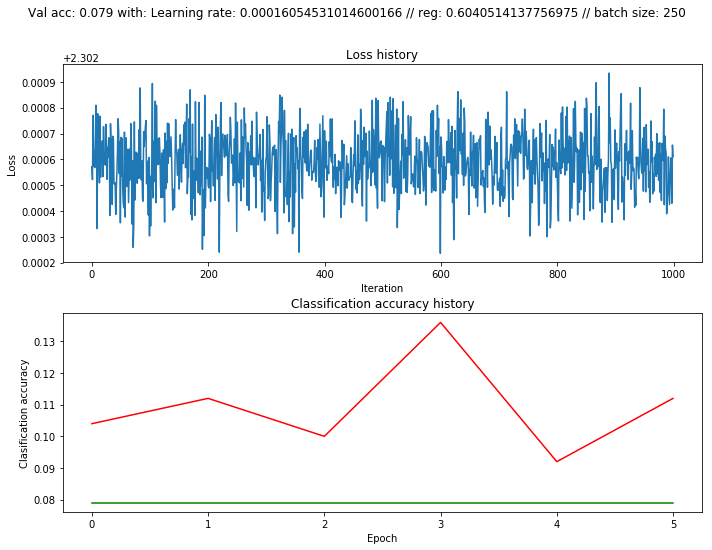

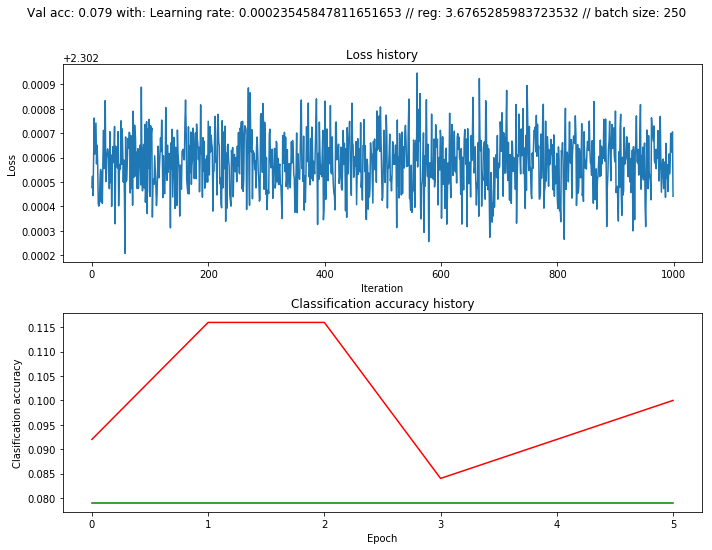

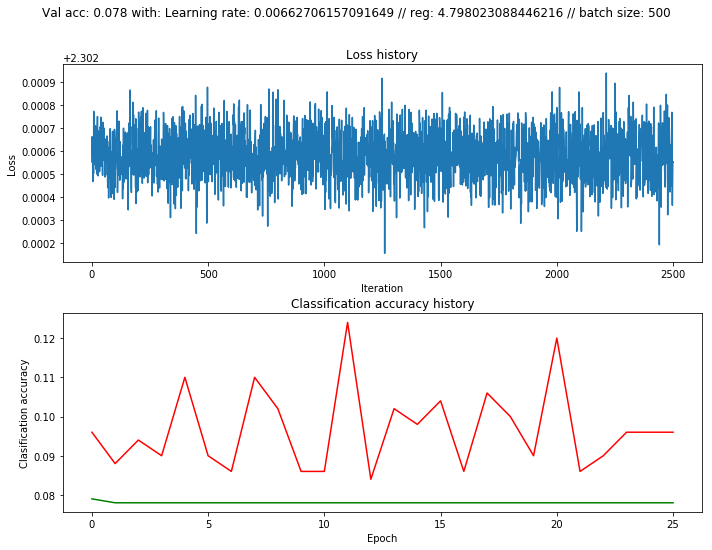

In [23]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)


################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################

def train(net, num_iters, learning_rate, reg, batch_size, verbose=False, **kwargs):
    return net.train(
        X_train_feats, 
        y_train, 
        X_val_feats, 
        y_val,
        num_iters=num_iters, 
        batch_size=batch_size,
        learning_rate=learning_rate, 
        learning_rate_decay=kwargs['decay_rate'],
        reg=0.25, 
        verbose=verbose
    )

def search(params):
    global best_acc
    global best_hyperparams
    global best_net
    global best_stats   
    print(f'{params}')
    stats = train(net, **params, verbose=True)
    if stats:
        val_acc = (net.predict(X_val_feats) == y_val).mean()
        print(f'Got {val_acc}')
        plot_hist(stats, params, val_acc)
        if val_acc > best_acc:
            best_acc = val_acc
            best_net = net
            best_hyperparams = params
            best_stats = stats
            print(f'Got --> {best_acc} <--')
            best_nets.append((net, best_acc, params))


def random_search(times=10):
    for index in range(times):
        print(f'{index} ' + '=' * 20)
        epochs = np.random.choice([4, 5])
        batch_size = np.random.choice([500, 250])
        params = {
            'learning_rate':10**np.random.uniform(-4, -2), 
            'reg': 10**np.random.uniform(-1, 2),
            'num_iters': batch_size * epochs,
            'batch_size': batch_size, 
            'decay_rate': np.random.choice([0.95, 0.9, 0.999])
        }
        search(params)
        print('='*20)        
random_search(times=10)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

In [ ]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print(test_acc)

# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!